
## Library importation

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

## Data loading

In [183]:
filename='numerical_classification/data-ori.csv'
df=pd.read_csv(filename,header=0,sep=',')

## Data Understanding


In [184]:
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out


In [185]:
df.tail()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in
4411,33.5,10.9,3.44,5.8,275,31.7,32.5,97.4,99,F,out


In [186]:
df.dtypes

HAEMATOCRIT     float64
HAEMOGLOBINS    float64
ERYTHROCYTE     float64
LEUCOCYTE       float64
THROMBOCYTE       int64
MCH             float64
MCHC            float64
MCV             float64
AGE               int64
SEX              object
SOURCE           object
dtype: object

we can see that we have sex and the target value type object 

In [187]:
df.columns

Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE'],
      dtype='object')

In [188]:
df.shape

(4412, 11)

In [189]:
df.size

48532

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 379.3+ KB


In [191]:
df.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,38.197688,12.741727,4.541260,8.718608,257.524479,28.234701,33.343042,84.612942,46.626473
std,5.974784,2.079903,0.784091,5.049041,113.972365,2.672639,1.228664,6.859101,21.731218
min,13.700000,3.800000,1.480000,1.100000,8.000000,14.900000,26.000000,54.000000,1.000000
25%,34.375000,11.400000,4.040000,5.675000,188.000000,27.200000,32.700000,81.500000,29.000000
50%,38.600000,12.900000,4.570000,7.600000,256.000000,28.700000,33.400000,85.400000,47.000000
75%,42.500000,14.200000,5.050000,10.300000,321.000000,29.800000,34.100000,88.700000,64.000000
max,69.000000,18.900000,7.860000,76.600000,1183.000000,40.800000,39.000000,115.600000,99.000000


here we can see that features are not one the scale  for exemple THROMBOCYTE are around between 8 and 1183 ,ERYTHROCYTEare around between 1.4 and 7.8

In [192]:
df.isnull().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [193]:
df.duplicated().sum()

0

In [194]:
df.corr()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
HAEMATOCRIT,1.000000,0.973267,0.864989,-0.217218,-0.003562,0.083714,0.108098,0.054948,-0.254799
HAEMOGLOBINS,0.973267,1.000000,0.818013,-0.208583,-0.045441,0.203248,0.314159,0.105379,-0.239480
ERYTHROCYTE,0.864989,0.818013,1.000000,-0.186711,0.025879,-0.383666,-0.048313,-0.436041,-0.412858
LEUCOCYTE,-0.217218,-0.208583,-0.186711,1.000000,0.283262,-0.014840,0.003194,-0.015885,0.191987
THROMBOCYTE,-0.003562,-0.045441,0.025879,0.283262,1.000000,-0.138058,-0.198921,-0.075961,0.031064
MCH,0.083714,0.203248,-0.383666,-0.014840,-0.138058,1.000000,0.589830,0.931804,0.350166
MCHC,0.108098,0.314159,-0.048313,0.003194,-0.198921,0.589830,1.000000,0.259672,0.041741
MCV,0.054948,0.105379,-0.436041,-0.015885,-0.075961,0.931804,0.259672,1.000000,0.395380
AGE,-0.254799,-0.239480,-0.412858,0.191987,0.031064,0.350166,0.041741,0.395380,1.000000


### Interpretation :
#### Taking into account this correlation table the values show a corelation between the following features
* HAEMOGLOBINS ,HAEMATOCRIT and ERYTHROCYTE
* MCH and MCV




### Exploring all Categorical Columns

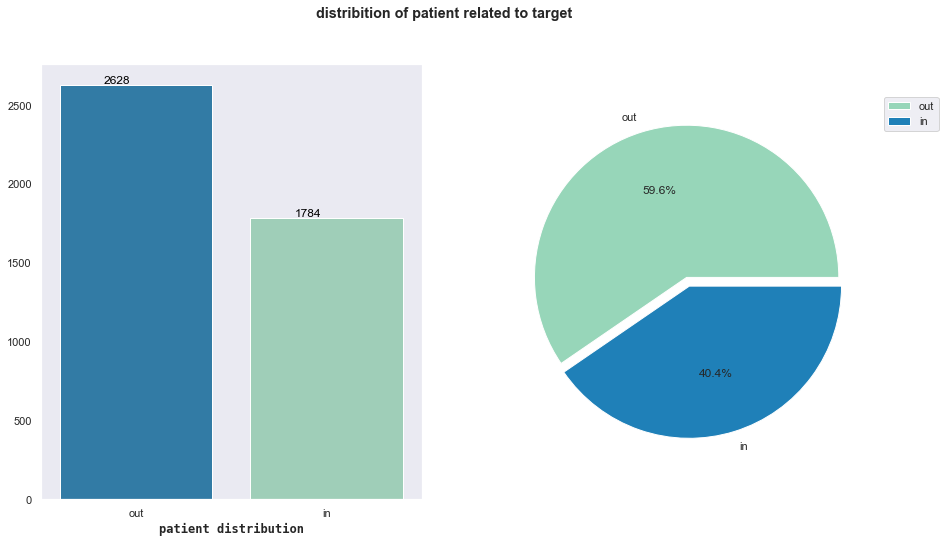

In [195]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['SOURCE'].value_counts().index
y=df['SOURCE'].value_counts().values.tolist()
data = df.groupby("SOURCE").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('patient distribution', weight='semibold', fontname = 'monospace')
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['SEX'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('distribition of patient related to target ',weight = 'bold')
plt.show()

In [196]:
df['SOURCE'].value_counts()

out    2628
in     1784
Name: SOURCE, dtype: int64

In [197]:
df['SEX'].value_counts()

M    2290
F    2122
Name: SEX, dtype: int64

In [198]:
categorical_features=[]
num_features=[]
for col in df.columns:
    if df[col].dtypes=='object':
        categorical_features.append(col)
    else:
        num_features.append(col)

### Continuous feature histograms.
#### observation de la distibution des features continus 

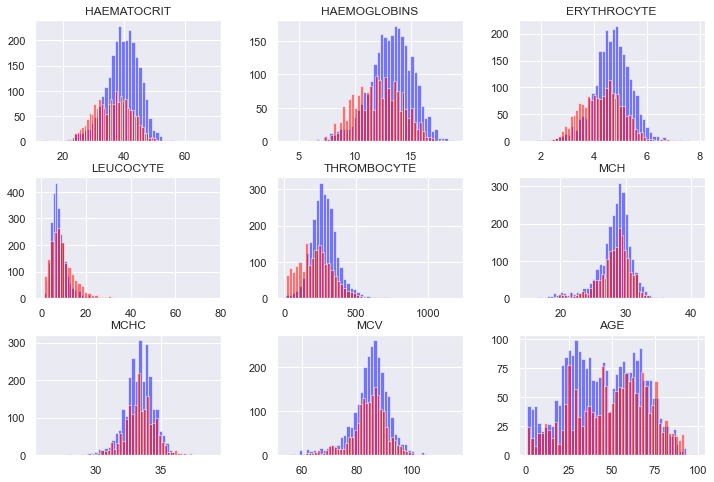

In [199]:
# Continuous feature histograms.
fig, ax = plt.subplots(3,3, figsize=(12, 8))
df[df['SOURCE'] == 'out'][num_features].hist(bins=50, color="blue", alpha=0.5, ax=ax)
df[df['SOURCE'] == 'in'][num_features].hist(bins=50, color="red", alpha=0.5, ax=ax)
plt.show()

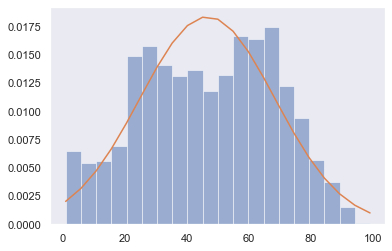

In [200]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Generate some data for this
# demonstration.
#data = np.random.normal(170, 10, 250)

# Fit a normal distribution to
# the data:
# mean and standard deviation

_, bins, _ = plt.hist(df['AGE'], 20, density=1, alpha=0.5)
mu, sigma = norm.fit(df['AGE'])
best_fit_line = norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)

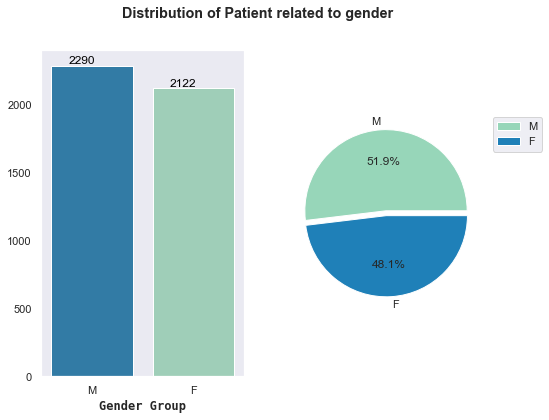

In [201]:
fig, ax = plt.subplots(1, 2, figsize=(8,6))
x=df['SEX'].value_counts().index
y=df['SEX'].value_counts().values.tolist()
data = df.groupby("SEX").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Gender Group', weight='semibold', fontname = 'monospace')
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['SEX'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Distribution of Patient related to gender',weight = 'bold')
plt.show()

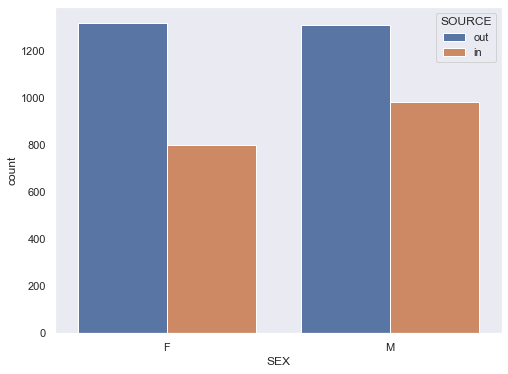

In [202]:

f, ax= plt.subplots( figsize=(8, 6))
sns.countplot(x = 'SEX', hue="SOURCE", data=df, ax=ax)
plt.show()

### Interpretation :
We can see that:
* We can see that:
* for the characteristic gender, there is not a very important difference when looking at the distribution of the data in relation to the target characteristic. 
we can decide to delete this columns


In [203]:
data=df.copy()
       

### Distribution of patients by age group

To better observe the impact of age on the data I decided to divide the data into age groups
* children [0-15]
* youth [16-25]
* adults [26-65]
* old [66 -100]

#### GROUP OF 0 to 15 years old

In [204]:
child=data.loc[data['AGE'].isin(range(0, 15))]
child

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
354,42.6,14.1,5.13,3.8,220,27.5,33.1,83.0,14,F,out
355,42.4,14.4,5.22,4.4,101,27.6,34.0,81.2,14,M,in
356,43.0,14.5,5.35,4.8,134,27.1,33.7,80.4,14,M,in
357,44.3,14.8,4.89,7.4,370,30.3,33.4,90.6,14,M,in


#### GROUP OF 16 to 25 years old

In [205]:
teenager=data.loc[data['AGE'].isin(range(16, 25))]
teenager

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
379,35.8,11.7,4.40,7.3,340,26.6,32.7,81.4,16,F,out
380,40.4,13.9,4.76,5.3,269,29.2,34.4,84.9,16,F,out
381,43.3,14.4,4.94,6.2,171,29.1,33.3,87.7,16,F,out
382,39.1,13.0,4.49,3.4,160,29.0,33.2,87.1,16,F,out
383,42.1,14.0,5.10,7.3,338,27.5,33.3,82.5,16,F,out
...,...,...,...,...,...,...,...,...,...,...,...
753,34.9,11.8,4.12,7.0,245,28.6,33.8,84.7,24,F,out
754,29.0,9.6,3.36,3.8,212,28.6,33.1,86.3,24,F,in
755,42.9,15.0,5.11,7.3,294,29.4,35.0,84.0,24,M,in
756,38.6,12.1,4.31,14.2,276,28.1,31.3,89.6,24,M,in


#### GROUP OF 26 to 65 years old

In [206]:
adult=data.loc[data['AGE'].isin(range(26, 65))]
adult

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
850,38.9,14.0,4.75,7.5,193,29.5,36.0,81.9,26,F,out
851,40.0,13.4,4.43,6.3,437,30.2,33.5,90.3,26,F,out
852,37.6,11.5,5.43,6.5,379,21.2,30.6,69.2,26,F,out
853,36.6,12.6,4.27,11.7,183,29.5,34.4,85.7,26,F,out
854,33.3,11.2,3.86,8.7,338,29.0,33.6,86.3,26,F,out
...,...,...,...,...,...,...,...,...,...,...,...
3324,36.0,12.1,4.32,12.0,461,28.0,33.6,83.3,64,M,in
3325,40.5,13.8,4.27,8.4,729,32.3,34.1,94.8,64,M,in
3326,44.7,14.2,5.46,10.4,201,26.0,31.8,81.9,64,M,in
3327,41.6,13.9,4.69,8.2,284,29.6,33.4,88.7,64,M,in


#### GROUP OF 66 to 100 years old

In [207]:
old=data.loc[data['AGE'].isin(range(66, 100))]
old

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
3402,35.9,11.9,4.65,15.7,400,25.6,33.1,77.2,66,F,out
3403,31.2,10.3,3.70,6.9,203,27.8,33.0,84.3,66,F,out
3404,34.4,11.2,4.54,8.2,358,24.7,32.6,75.8,66,F,out
3405,38.1,12.9,4.71,5.0,295,27.4,33.9,80.9,66,M,out
3406,38.3,13.9,4.39,6.4,152,31.7,36.3,87.2,66,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in


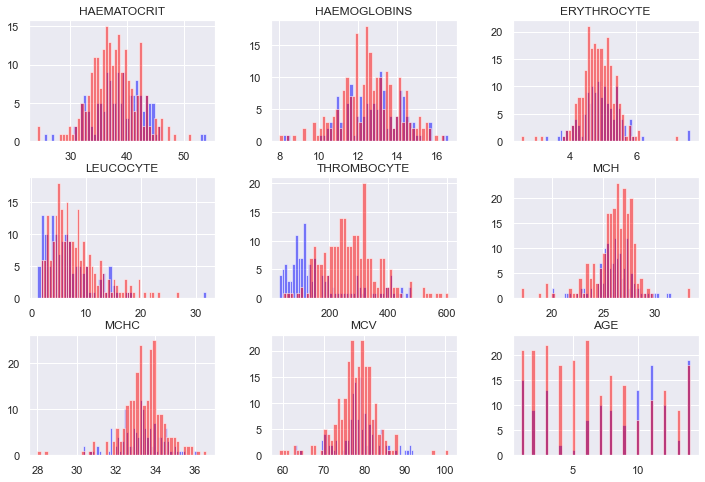

In [208]:
# Continuous feature histograms.
fig, ax = plt.subplots(3,3,figsize=(12, 8))
child[child['SOURCE'] == 'in'][num_features].hist(bins=50, color="blue", alpha=0.5, ax=ax)
child[child['SOURCE'] == 'out'][num_features].hist(bins=50, color="red", alpha=0.5, ax=ax)
plt.show()

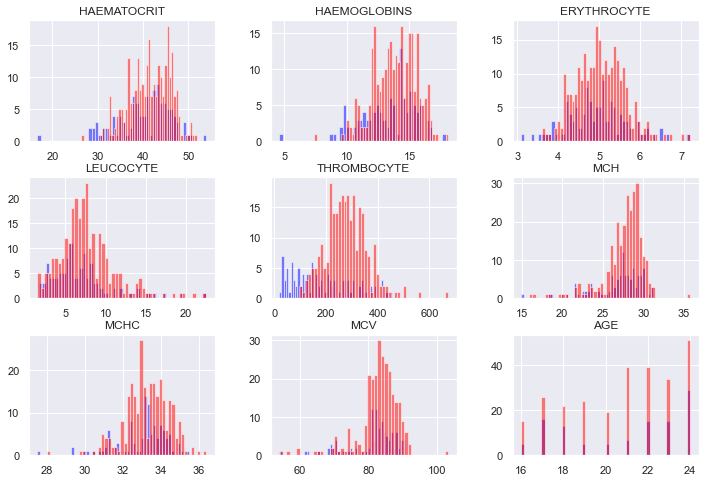

In [209]:
# Continuous feature histograms.
fig, ax = plt.subplots(3,3,figsize=(12, 8))
teenager[teenager['SOURCE'] == 'in'][num_features].hist(bins=50, color="blue", alpha=0.5, ax=ax)
teenager[teenager['SOURCE'] == 'out'][num_features].hist(bins=50, color="red", alpha=0.5, ax=ax)
plt.show()

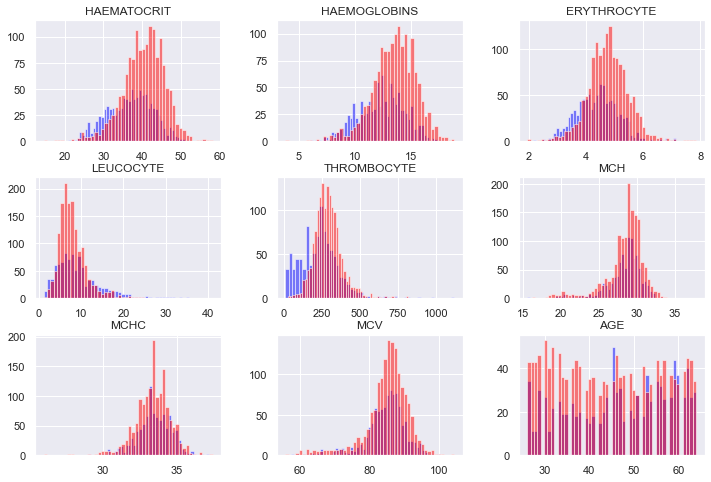

In [210]:
# Continuous feature histograms.
fig, ax = plt.subplots(3,3,figsize=(12, 8))
adult[adult['SOURCE'] == 'in'][num_features].hist(bins=50, color="blue", alpha=0.5, ax=ax)
adult[adult['SOURCE'] == 'out'][num_features].hist(bins=50, color="red", alpha=0.5, ax=ax)
plt.show()

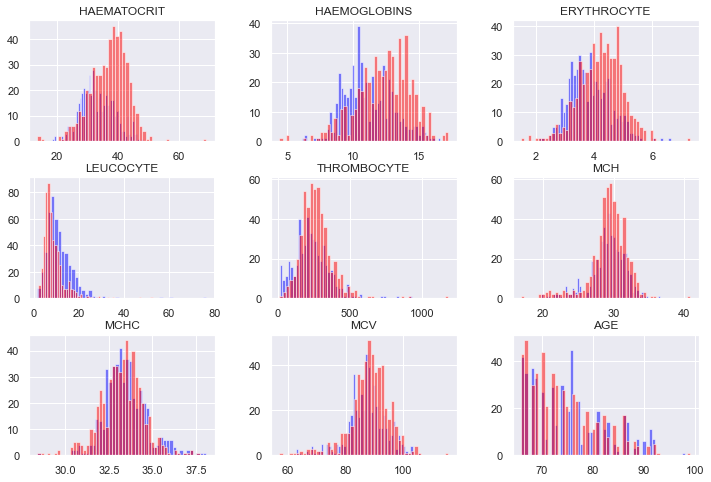

In [211]:
# Continuous feature histograms.
fig, ax = plt.subplots(3,3,figsize=(12, 8))
old[old['SOURCE'] == 'in'][num_features].hist(bins=50, color="blue", alpha=0.5, ax=ax)
old[old['SOURCE'] == 'out'][num_features].hist(bins=50, color="red", alpha=0.5, ax=ax)
plt.show()

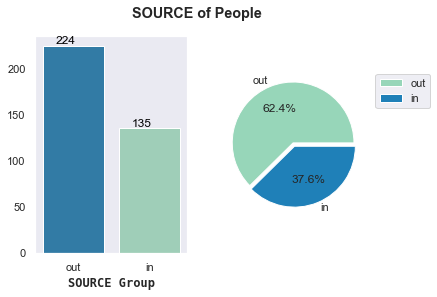

In [212]:
fig, ax = plt.subplots(1, 2, figsize=(6,4))
x=child['SOURCE'].value_counts().index
y=child['SOURCE'].value_counts().values.tolist()
data = child.groupby("SOURCE").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('SOURCE Group', weight='semibold', fontname = 'monospace')
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in child['SEX'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('SOURCE of People',weight = 'bold')
plt.show()

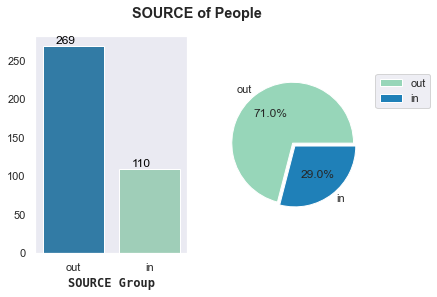

In [213]:
fig, ax = plt.subplots(1, 2, figsize=(6,4))
x=teenager['SOURCE'].value_counts().index
y=teenager['SOURCE'].value_counts().values.tolist()
data = teenager.groupby("SOURCE").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('SOURCE Group', weight='semibold', fontname = 'monospace')
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in teenager['SEX'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('SOURCE of People',weight = 'bold')
plt.show()

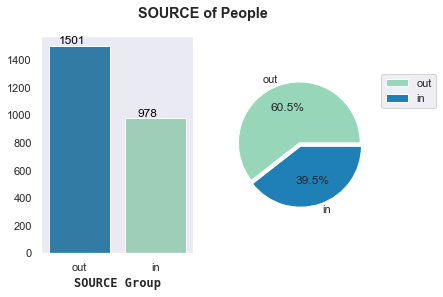

In [214]:
fig, ax = plt.subplots(1, 2, figsize=(6,4))
x=adult['SOURCE'].value_counts().index
y=adult['SOURCE'].value_counts().values.tolist()
data = adult.groupby("SOURCE").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('SOURCE Group', weight='semibold', fontname = 'monospace')
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in adult['SEX'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('SOURCE of People',weight = 'bold')
plt.show()

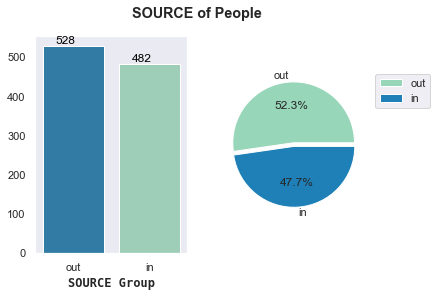

In [215]:
fig, ax = plt.subplots(1, 2, figsize=(6,4))
x=old['SOURCE'].value_counts().index
y=old['SOURCE'].value_counts().values.tolist()
data = old.groupby("SOURCE").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('SOURCE Group', weight='semibold', fontname = 'monospace')
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in old['SEX'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('SOURCE of People',weight = 'bold')
plt.show()

### Interpretation :
By observing the results we can see that the age range does not greatly impact the result but however,
in the three groups of patients, the age histogram does not show any relevant results since it is stacked together and does not show any similarity, so the AGE column could be deleted.

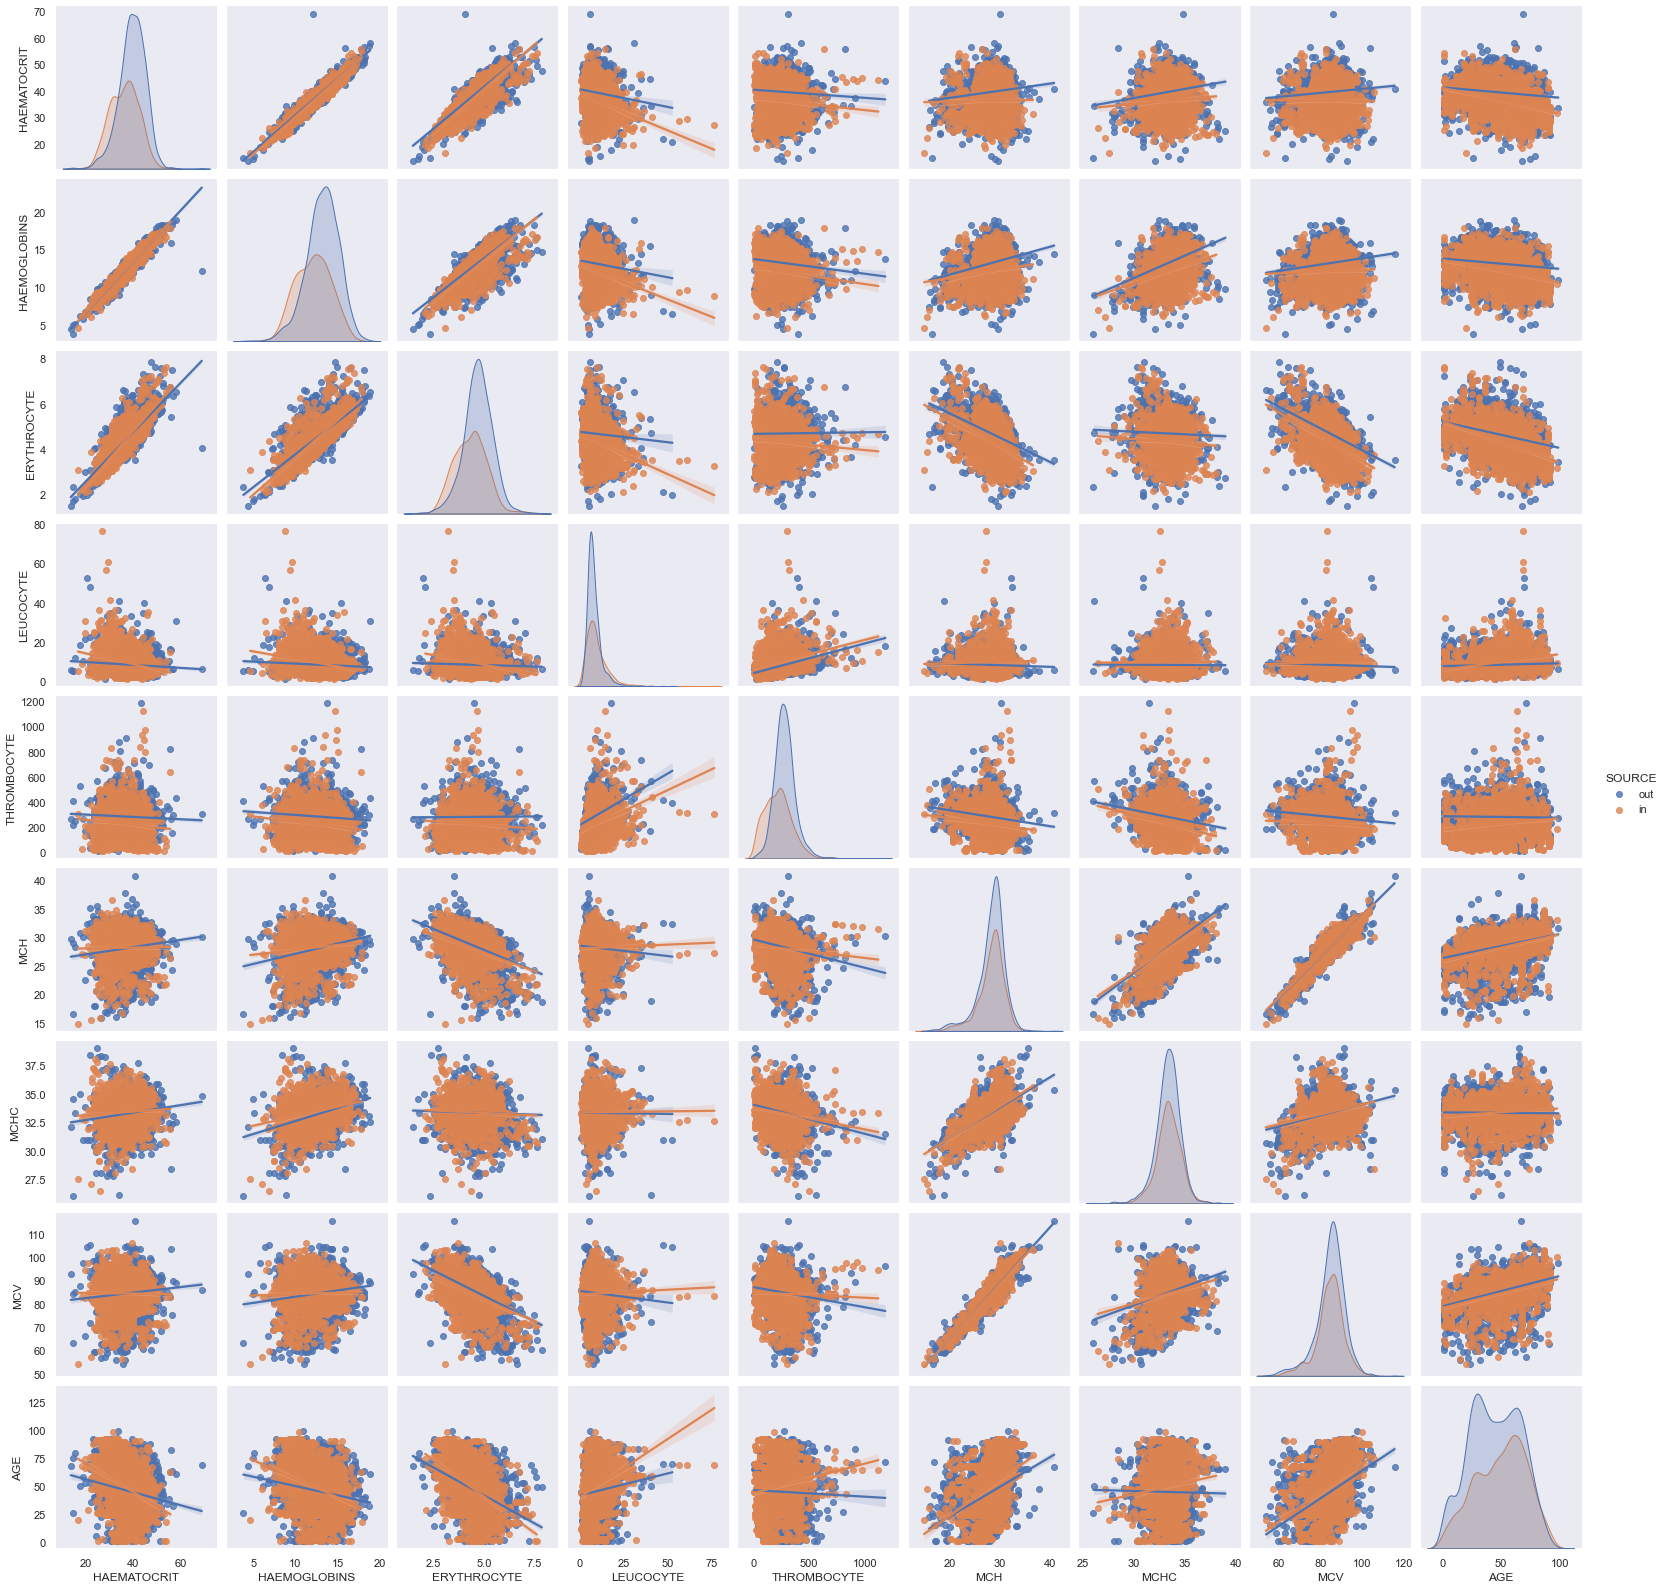

In [216]:
sns.pairplot(df, hue='SOURCE' ,kind='reg')

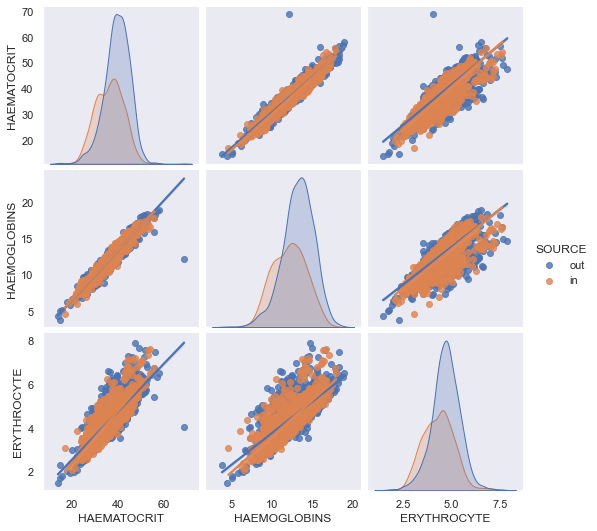

In [217]:
sns.pairplot(df, hue='SOURCE' ,kind='reg', vars=['HAEMATOCRIT','HAEMOGLOBINS','ERYTHROCYTE'])


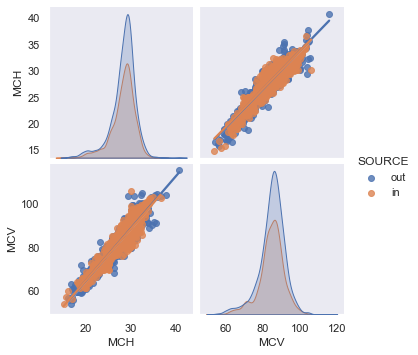

In [218]:
sns.pairplot(df, hue='SOURCE' ,kind='reg', vars=['MCH','MCV'])

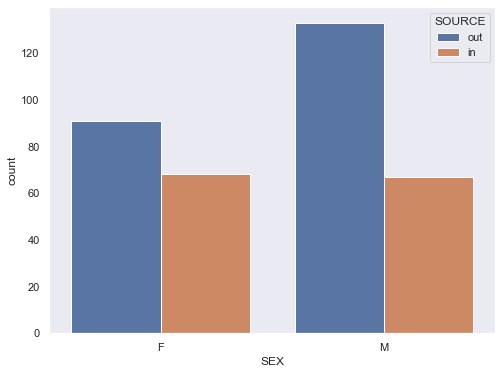

In [219]:
f, ax= plt.subplots( figsize=(8, 6))
sns.countplot(x = 'SEX', hue="SOURCE", data=child, ax=ax)
plt.show()

## Data Preprocessing

Searching for the unique values of each features

In [220]:
print("Unique values (per feature): \n{}\n".format(df.nunique()))

Unique values (per feature): 
HAEMATOCRIT     326
HAEMOGLOBINS    128
ERYTHROCYTE     433
LEUCOCYTE       276
THROMBOCYTE     554
MCH             189
MCHC            105
MCV             406
AGE              95
SEX               2
SOURCE            2
dtype: int64



In [221]:
df['SEX'].replace({'F' : 1, 'M' : 0}, inplace=True)
df['SOURCE'].replace({'out' : 1, 'in' : 0}, inplace=True)
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,1,1
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,1,1
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,1,1
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,1,1
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,1,0
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,1,0
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,1,1
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,1,0


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   int64  
 10  SOURCE        4412 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 379.3 KB


In [223]:
#df=df.drop('SEX',1)
df.drop(columns=['SEX','AGE'],inplace = True)



### Outliers Detection

The presence of outliers in the dataset can result in a poor fit and lower the predictive modeling performance.

We are going to create a function called diagnostic_plots to visialise the feautres distribution which takes as parameters the dataset and the feature to plot

* distplot: Depicts the variation in the data distribution
* probplot: Generates a probability plot of sample data against the quantiles of a specified theoretical distribution
* boxplot: A method to graphically show the spread of a numerical variable through quartiles

In [224]:
import scipy.stats as stats
def diagnostic_plots(df, variable):


    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\ouedr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


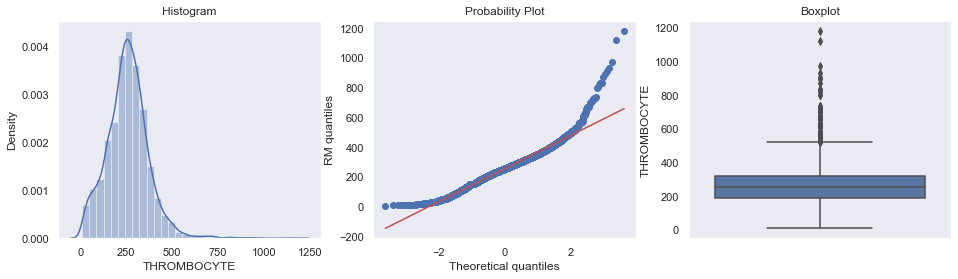

C:\Users\ouedr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


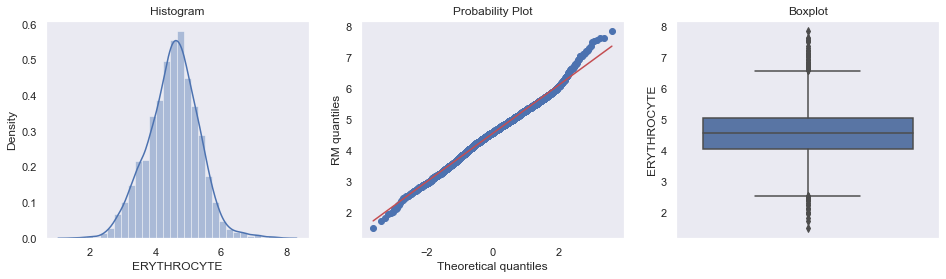

C:\Users\ouedr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


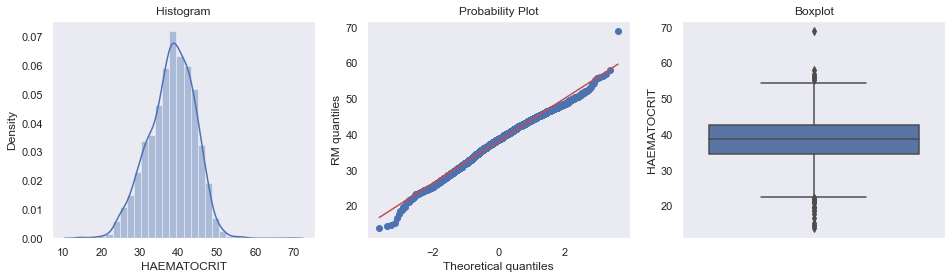

C:\Users\ouedr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


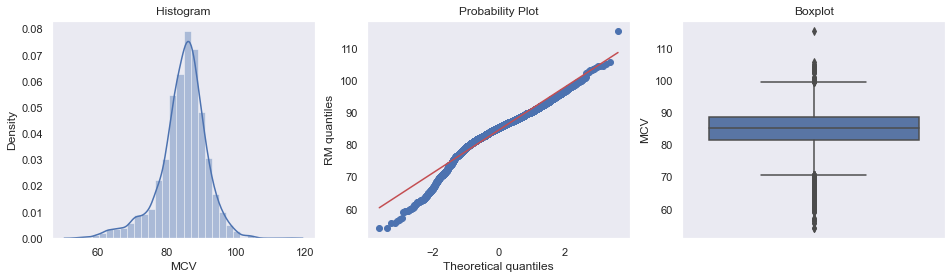

C:\Users\ouedr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


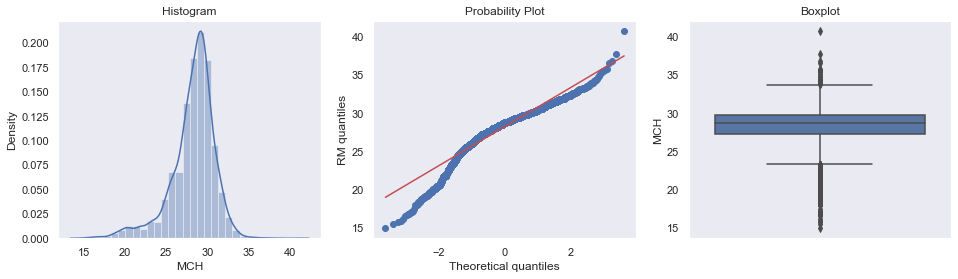

C:\Users\ouedr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


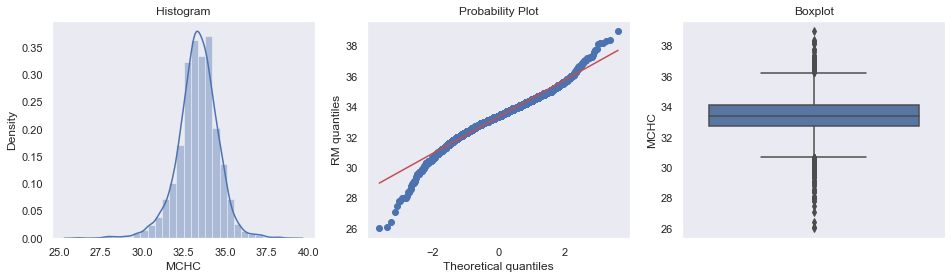

In [225]:
diagnostic_plots(df, 'THROMBOCYTE')
diagnostic_plots(df, 'ERYTHROCYTE')
diagnostic_plots(df, 'HAEMATOCRIT')
diagnostic_plots(df, 'MCV')
diagnostic_plots(df, 'MCH')
diagnostic_plots(df, 'MCHC')

### Interpretation :
Almost all features have outliers,you can see it more clearly with the third graph where some values overflow the boxplot, normalization could solve this problem to prevent outliers from affecting our classifications

#### Data normalisation

In [226]:
#cols_to_scale = ['HAEMATOCRIT','HAEMOGLOBINS','ERYTHROCYTE','LEUCOCYTE','THROMBOCYTE','MCH','MCHC','MCV','AGE']
cols_to_scale = ['HAEMATOCRIT','HAEMOGLOBINS','ERYTHROCYTE','LEUCOCYTE','THROMBOCYTE','MCH','MCHC','MCV']
df2 = df.copy(deep=True)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])


In [227]:
df2.head(100)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,SOURCE
0,-0.518519,-0.452826,0.138698,-0.479078,0.460475,-1.060757,0.209160,-1.328742,1
1,0.887549,0.989713,1.082573,0.788634,0.671077,-0.274928,0.534754,-0.570539,1
2,-0.786341,-0.693249,0.253494,0.887673,0.416600,-1.659484,0.290558,-2.028621,1
3,0.151037,0.460782,0.559615,0.352858,0.951878,-0.274928,1.348738,-0.891317,1
4,-1.221553,-1.366434,-0.397014,2.650584,0.662302,-1.809166,-1.093215,-1.693263,1
...,...,...,...,...,...,...,...,...,...
95,-0.384608,-0.260487,-0.103648,-1.093125,-0.346829,-0.312349,0.534754,-0.599701,1
96,0.552771,0.412697,0.444820,-0.142342,-0.039703,-0.162667,-0.442027,0.041855,1
97,-0.803080,-0.741334,-0.154668,-0.300806,0.539451,-1.098178,0.127762,-1.314161,1
98,-0.652430,-0.645164,-0.078138,1.026329,-0.285404,-1.060757,-0.116434,-1.168353,1


C:\Users\ouedr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


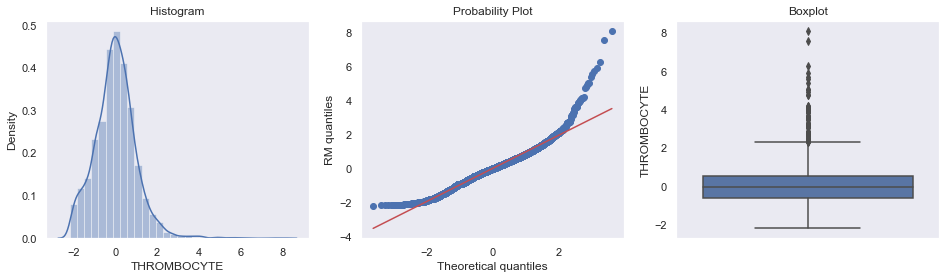

C:\Users\ouedr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


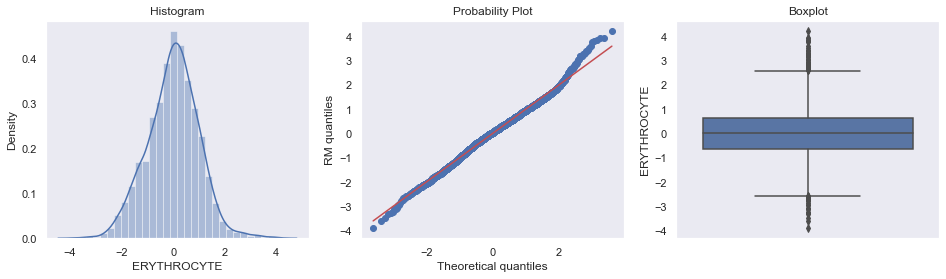

C:\Users\ouedr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


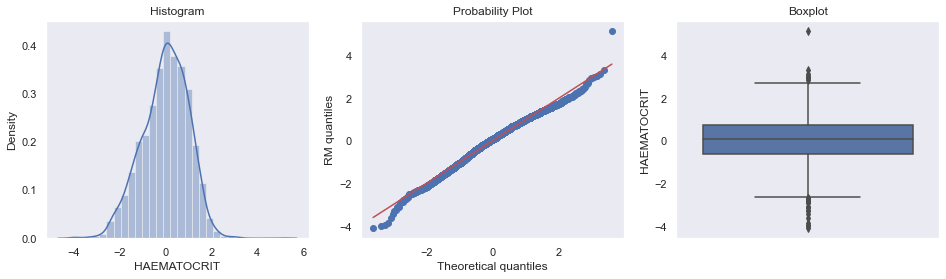

C:\Users\ouedr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


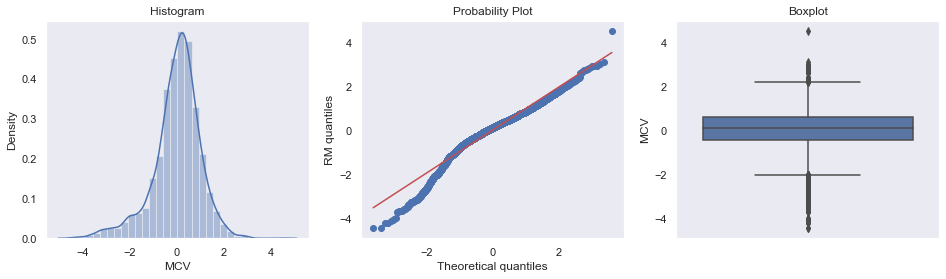

C:\Users\ouedr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


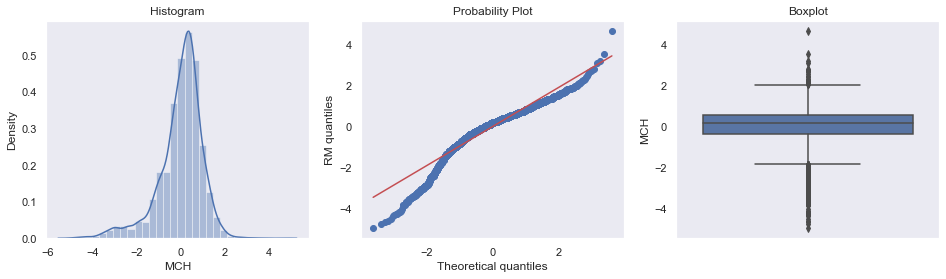

C:\Users\ouedr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


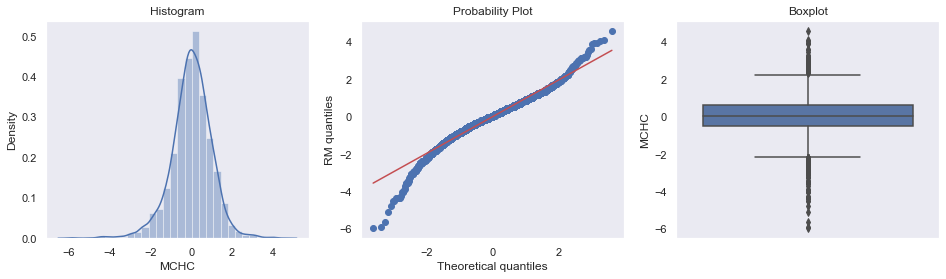

In [232]:
diagnostic_plots(df2, 'THROMBOCYTE')
diagnostic_plots(df2, 'ERYTHROCYTE')
diagnostic_plots(df2, 'HAEMATOCRIT')
diagnostic_plots(df2, 'MCV')
diagnostic_plots(df2, 'MCH')
diagnostic_plots(df2, 'MCHC')

In [228]:
from sklearn.model_selection import train_test_split
# set training and testing set
#y = df2.iloc[:,10]
#X = df2.iloc[:,0:10]
y = df2.iloc[:,8]
X = df2.iloc[:,0:8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [229]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3529, 8)
(883, 8)
(3529,)
(883,)


In [230]:
type(X_train)

pandas.core.frame.DataFrame

In [231]:
np.savetxt('numerical_classification/train.csv',X_train)
np.savetxt('numerical_classification/trainLabel.csv',y_train, fmt='%i')
np.savetxt('numerical_classification/test.csv',X_test)
np.savetxt('numerical_classification/testLabel.csv',y_test, fmt='%i')